In [18]:
.libPaths(c('/sc/arion/projects/CommonMind/tereza/conda/envs/dreamlet/lib/R/library', .libPaths()))
.libPaths()

[1] "/sc/arion/projects/CommonMind/tereza/conda/envs/dreamlet/lib/R/library"
[2] "/sc/arion/projects/roussp01a/tereza/R_libs_4_1_v2"

In [19]:
library(dreamlet)
library(Seurat)
library(Signac)
library(ggplot2)
library(dplyr)

set.seed(1234)
getwd()

[1] "/sc/arion/projects/CommonMind/3D_Genome/single_cell/cellranger/Merged_data"

In [20]:
library(SingleR)
setwd('/sc/arion/projects/CommonMind/3D_Genome/single_cell/cellranger/Merged_data/')
getwd()

[1] "/sc/arion/projects/CommonMind/3D_Genome/single_cell/cellranger/Merged_data"

In [4]:
#save as h5ad
.libPaths(c("/sc/arion/projects/roussp01a/tereza/R_libs_4_1_v2/", .libPaths()))
library(SeuratDisk)
library(SeuratData)

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

-- Installed datasets ------------------------------------- SeuratData v0.2.2 --

v pbmcsca 3.0.0                         


-------------------------------------- Key -------------------------------------

v Dataset loaded successfully
> Dataset built with a newer version of Seurat than installed
(?) Unknown version of Seurat installed




In [5]:
library(basilisk)
library(Seurat)
library(SingleCellExperiment)
getwd()
library(zellkonverter)

[1] "/sc/arion/projects/CommonMind/3D_Genome/single_cell/cellranger/Merged_data"

In [10]:
#------------- Peak calling
olig <- readRDS('./OPC_Olig_all_preprocessed_cdDNA.rds')
olig

An object of class Seurat 
215236 features across 60767 samples within 3 assays 
Active assay: SCT (16196 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 12 dimensional reductions calculated: pca, harmonyBB.pca, umapBB.rnah, lsi, harmonyBB.lsi, umapBB.atach, wnnBB.umap, harmony.dream2BB.pca, umap.dream2BB.rnah, harmony.dream2BB.lsi, umap.dream2BB.atach, wnn.dream2BB.umap

In [11]:
colnames(olig@meta.data)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "gex_barcode"                      
 [5] "atac_barcode"                      "is_cell"                          
 [7] "excluded_reason"                   "gex_raw_reads"                    
 [9] "gex_mapped_reads"                  "gex_conf_intergenic_reads"        
[11] "gex_conf_exonic_reads"             "gex_conf_intronic_reads"          
[13] "gex_conf_exonic_unique_reads"      "gex_conf_exonic_antisense_reads"  
[15] "gex_conf_exonic_dup_reads"         "gex_exonic_umis"                  
[17] "gex_conf_intronic_unique_reads"    "gex_conf_intronic_antisense_reads"
[19] "gex_conf_intronic_dup_reads"       "gex_intronic_umis"                
[21] "gex_conf_txomic_unique_reads"      "gex_umis_count"                   
[23] "gex_genes_count"                   "atac_raw_reads"                   
[25] "atac_unmapped_reads"               "atac_lowmapq"                     
[27] "atac_dup_reads"                    "atac_chimeric_reads"              
[29] "atac_mitochondrial_reads"          "atac_fragments"                   
[31] "atac_TSS_fragments"                "atac_peak_region_fragments"       
[33] "atac_peak_region_cutsites"         "percent.mt"                       
[35] "nCount_ATAC"                       "nFeature_ATAC"                    
[37] "sex"                               "age"                              
[39] "mitoRatio"                         "percent.ribo"                     
[41] "riboRatio"                         "percent.hb"                       
[43] "log10GenesPerUMI"                  "nucleosome_signal"                
[45] "nucleosome_percentile"             "TSS.enrichment"                   
[47] "TSS.percentile"                    "pct_reads_in_peaks"               
[49] "blacklist_fraction"                "brain"                            
[51] "brain.bank"                        "nCount_SCT"                       
[53] "nFeature_SCT"                      "SCT_snn_res.0.2"                  
[55] "seurat_clusters"                   "ATAC_snn_res.0.2"                 
[57] "SCT.weight"                        "ATAC.weight"                      
[59] "wsnn_res.0.2"                      "RNA_snn_res.0.2"                  
[61] "pANN_0.25_0.09_1648"               "DF.classifications_0.25_0.09_1648"
[63] "pANN_0.25_0.09_1940"               "DF.classifications_0.25_0.09_1940"
[65] "pANN_0.25_0.09_2285"               "DF.classifications_0.25_0.09_2285"
[67] "pANN_0.25_0.09_1241"               "DF.classifications_0.25_0.09_1241"
[69] "SCT_snn_res.0.4"                   "ATAC_snn_res.0.4"                 
[71] "wsnn_res.0.4"                      "m1c_labels_subclass"              
[73] "age.group"                         "seurat_clusters_origBB"           
[75] "m1c_labels_subclass_origBB"        "anno_clus"                        
[77] "anno_clus_origBB"                  "anno_clus_origBB2"                
[79] "SCT.dream2BB.weight"               "ATAC.dream2BB.weight"             
[81] "seurat_clusters_dream.origBB"      "seurat_clusters_dreamorigBB"      
[83] "m1c_labels_subclass.dreamBB"       "anno_clus_dreamBB"                
[85] "anno_clus_dreamorigBB"

In [18]:
olig <-  olig[, sample(colnames(olig), size =6077, replace=F)]
olig

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from harmonybb.lsi_ to harmonybblsi_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from harmony.dream2bb.pca_ to harmonydream2bbpca_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap.dream2bb.rnah_ to umapdream2bbrnah_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from harmony.dream2bb.lsi_ to harmonydream2bblsi_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap.dream2bb.atach_ to umapdream2bbatach_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from wnn.dream2bb.umap_ to wnndream2bbumap_"


An object of class Seurat 
215236 features across 6077 samples within 3 assays 
Active assay: SCT (16196 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 12 dimensional reductions calculated: pca, harmonyBB.pca, umapBB.rnah, lsi, harmonyBB.lsi, umapBB.atach, wnnBB.umap, harmony.dream2BB.pca, umap.dream2BB.rnah, harmony.dream2BB.lsi, umap.dream2BB.atach, wnn.dream2BB.umap

In [ ]:
#=================== MONOCLE on downsampled OPC&Olig (10x)
#- ! note that cell_data_set from monocle3 is slightly different compared to CellDataSet in monocle

In [25]:
library(monocle)

In [28]:
#--- this commands doesn't work or doesn't produce the latest version of CellDataSet 

#importCDS(as.SingleCellExperiment(olig))

In [26]:
CDS <- as.CellDataSet(olig)

In [27]:
CDS

CellDataSet (storageMode: environment)
assayData: 16196 features, 6077 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: caudate_150663_AAAGGACGTACCGGAT-1
    caudate_150663_AACCTTAAGGAACGCG-1 ...
    caudate_150673_CAACAGGCAAAGCTAA-1 (6077 total)
  varLabels: orig.ident nCount_RNA ... Size_Factor (86 total)
  varMetadata: labelDescription
featureData
  featureNames: SAMD11 NOC2L ... EIF1AY (16196 total)
  fvarLabels: gene_short_name
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [ ]:
#==== next few steps are preprocessing for dim reduction in monocle

In [29]:
#--- gene expression dispersion 

CDS <- estimateSizeFactors(CDS)
CDS <- estimateDispersions(CDS)

Warning message:
"`group_by_()` was deprecated in dplyr 0.7.0.
i Please use `group_by()` instead.
i See vignette('programming') for more help
i The deprecated feature was likely used in the dplyr package.
  Please report the issue at <https://github.com/tidyverse/dplyr/issues>."
Warning message:
"`select_()` was deprecated in dplyr 0.7.0.
i Please use `select()` instead.
i The deprecated feature was likely used in the dplyr package.
  Please report the issue at <https://github.com/tidyverse/dplyr/issues>."
Removing 241 outliers



In [30]:
disp_table <- dispersionTable(CDS)


In [31]:
head(disp_table)

,gene_id,mean_expression,dispersion_fit,dispersion_empirical
,<chr>,<dbl>,<dbl>,<dbl>
1,SAMD11,0.001752823,354.74538,25.954325
2,NOC2L,0.043150238,15.13990,7.126064
3,KLHL17,0.005893279,106.04534,6.381653
4,HES4,0.030970188,20.79506,12.048566
5,ISG15,0.014017949,45.02327,23.550699
6,AGRN,0.057330919,11.58320,4.458594


In [32]:
ordering_genes <- subset(disp_table, mean_expression >= 0.1)
head(ordering_genes)

,gene_id,mean_expression,dispersion_fit,dispersion_empirical
,<chr>,<dbl>,<dbl>,<dbl>
7,C1orf159,0.1371653,5.284084,5.064724
16,ACAP3,0.3128921,2.743569,3.228761
21,CCNL2,0.2155098,3.639638,4.087565
24,VWA1,0.1450882,5.037066,3.230911
36,GNB1,0.8668985,1.476283,1.328638
40,PRKCZ,0.1926229,3.981723,4.230922


In [35]:
CDS <- setOrderingFilter(CDS, ordering_genes)


In [36]:
CDS

CellDataSet (storageMode: environment)
assayData: 16196 features, 6077 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: caudate_150663_AAAGGACGTACCGGAT-1
    caudate_150663_AACCTTAAGGAACGCG-1 ...
    caudate_150673_CAACAGGCAAAGCTAA-1 (6077 total)
  varLabels: orig.ident nCount_RNA ... Size_Factor (86 total)
  varMetadata: labelDescription
featureData
  featureNames: SAMD11 NOC2L ... EIF1AY (16196 total)
  fvarLabels: gene_short_name use_for_ordering
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [37]:
# calculate dimensionality reduction via DDRTree
CDS <- reduceDimension(CDS,  method = 'DDRTree')


In [39]:
#--- order cells
CDS <- orderCells(CDS)

Warning message in graph.dfs(dp_mst, root = root_cell, neimode = "all", unreachable = FALSE, :
"Argument `neimode' is deprecated; use `mode' instead"
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(projection)

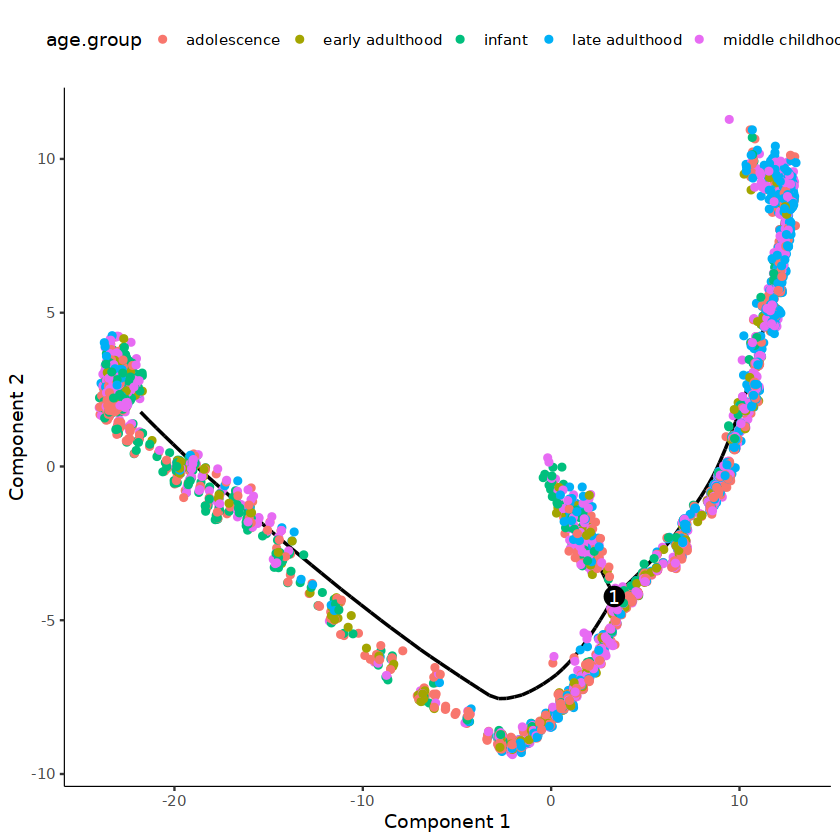

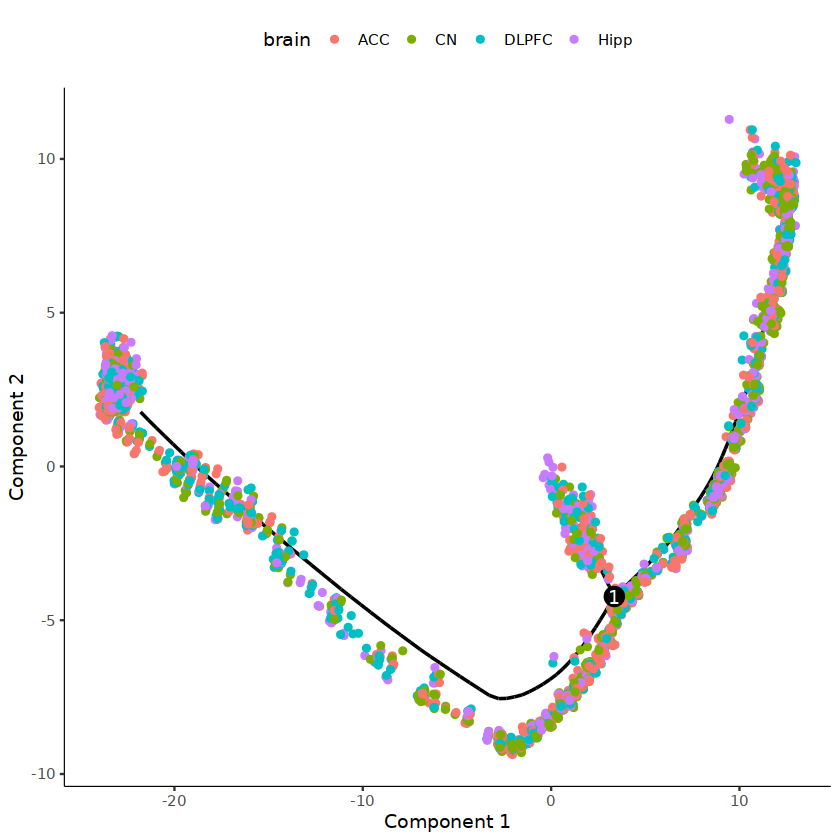

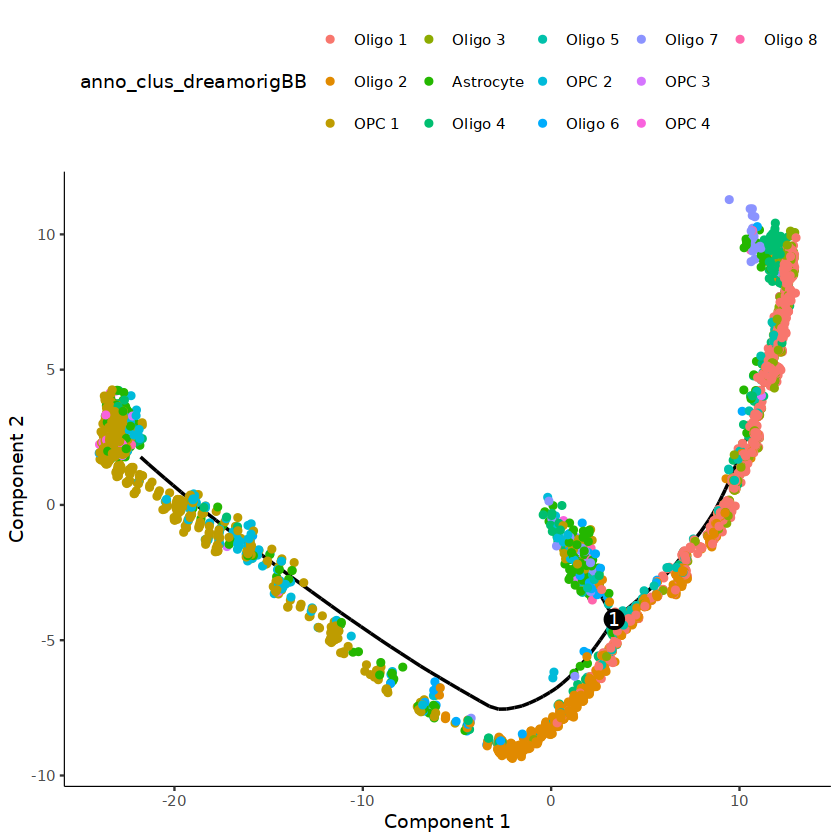

In [40]:
#---- plot ordered cells and inferred trajectory

plot_cell_trajectory(CDS, color_by = "age.group")
plot_cell_trajectory(CDS, color_by = "brain")
plot_cell_trajectory(CDS, color_by = "anno_clus_dreamorigBB")

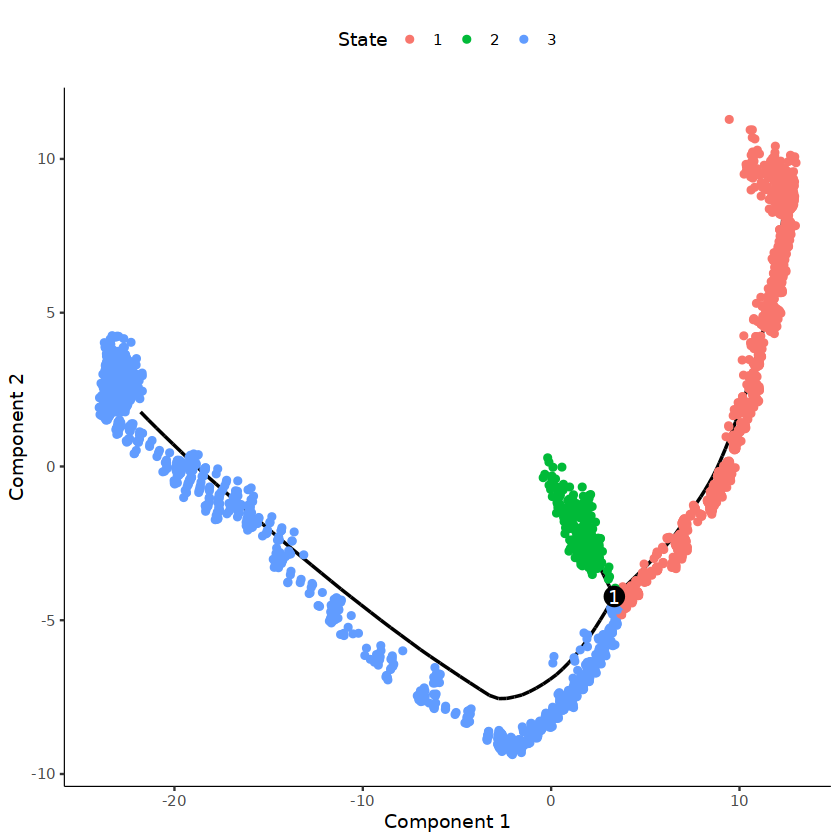

In [42]:
plot_cell_trajectory(CDS, color_by = "State")

In [44]:
#--- set function to detect pseudotime based on AGE.group!
GM_state <- function(cds){
  if (length(unique(pData(cds)$State)) > 1){
    T0_counts <- table(pData(cds)$State, pData(cds)$age.group)[,"0"]
    return(as.numeric(names(T0_counts)[which
          (T0_counts == max(T0_counts))]))
  } else {
    return (1)
  }
}
#plot_cell_trajectory(CDS, color_by = "Pseudotime")

In [ ]:
CDS <- orderCells(CDS, root_state = GM_state(CDS))


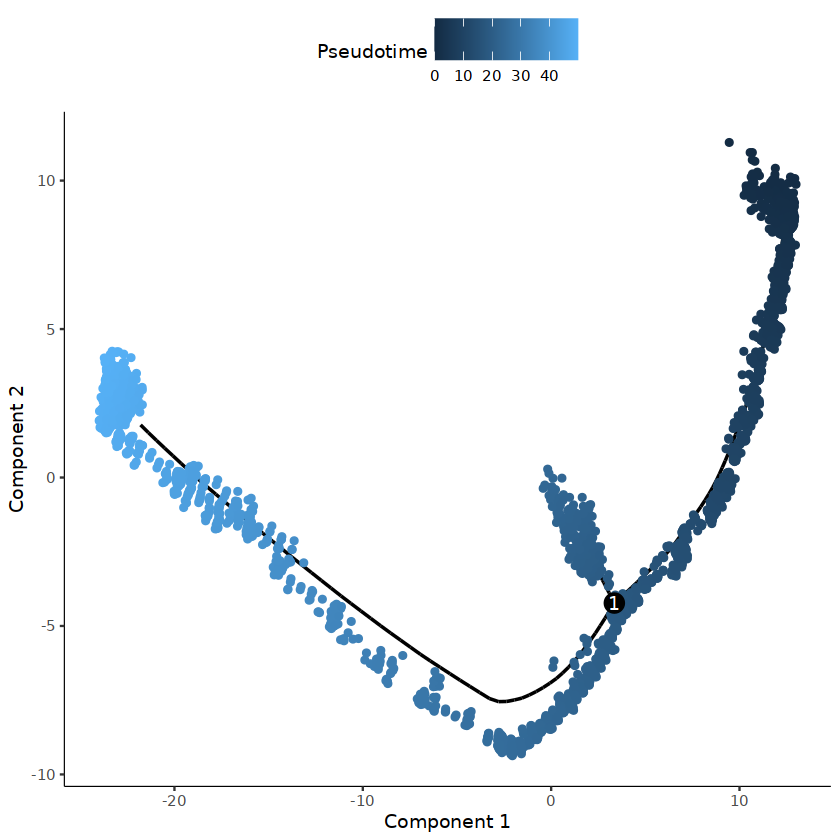

In [46]:
plot_cell_trajectory(CDS, color_by = "Pseudotime")

In [41]:
CDS

CellDataSet (storageMode: environment)
assayData: 16196 features, 6077 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: caudate_150663_AAAGGACGTACCGGAT-1
    caudate_150663_AACCTTAAGGAACGCG-1 ...
    caudate_150673_CAACAGGCAAAGCTAA-1 (6077 total)
  varLabels: orig.ident nCount_RNA ... State (88 total)
  varMetadata: labelDescription
featureData
  featureNames: SAMD11 NOC2L ... EIF1AY (16196 total)
  fvarLabels: gene_short_name use_for_ordering
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [68]:
colnames(CDS@phenoData)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "gex_barcode"                      
 [5] "atac_barcode"                      "is_cell"                          
 [7] "excluded_reason"                   "gex_raw_reads"                    
 [9] "gex_mapped_reads"                  "gex_conf_intergenic_reads"        
[11] "gex_conf_exonic_reads"             "gex_conf_intronic_reads"          
[13] "gex_conf_exonic_unique_reads"      "gex_conf_exonic_antisense_reads"  
[15] "gex_conf_exonic_dup_reads"         "gex_exonic_umis"                  
[17] "gex_conf_intronic_unique_reads"    "gex_conf_intronic_antisense_reads"
[19] "gex_conf_intronic_dup_reads"       "gex_intronic_umis"                
[21] "gex_conf_txomic_unique_reads"      "gex_umis_count"                   
[23] "gex_genes_count"                   "atac_raw_reads"                   
[25] "atac_unmapped_reads"               "atac_lowmapq"                     
[27] "atac_dup_reads"                    "atac_chimeric_reads"              
[29] "atac_mitochondrial_reads"          "atac_fragments"                   
[31] "atac_TSS_fragments"                "atac_peak_region_fragments"       
[33] "atac_peak_region_cutsites"         "percent.mt"                       
[35] "nCount_ATAC"                       "nFeature_ATAC"                    
[37] "sex"                               "age"                              
[39] "mitoRatio"                         "percent.ribo"                     
[41] "riboRatio"                         "percent.hb"                       
[43] "log10GenesPerUMI"                  "nucleosome_signal"                
[45] "nucleosome_percentile"             "TSS.enrichment"                   
[47] "TSS.percentile"                    "pct_reads_in_peaks"               
[49] "blacklist_fraction"                "brain"                            
[51] "brain.bank"                        "nCount_SCT"                       
[53] "nFeature_SCT"                      "SCT_snn_res.0.2"                  
[55] "seurat_clusters"                   "ATAC_snn_res.0.2"                 
[57] "SCT.weight"                        "ATAC.weight"                      
[59] "wsnn_res.0.2"                      "RNA_snn_res.0.2"                  
[61] "pANN_0.25_0.09_1648"               "DF.classifications_0.25_0.09_1648"
[63] "pANN_0.25_0.09_1940"               "DF.classifications_0.25_0.09_1940"
[65] "pANN_0.25_0.09_2285"               "DF.classifications_0.25_0.09_2285"
[67] "pANN_0.25_0.09_1241"               "DF.classifications_0.25_0.09_1241"
[69] "SCT_snn_res.0.4"                   "ATAC_snn_res.0.4"                 
[71] "wsnn_res.0.4"                      "m1c_labels_subclass"              
[73] "age.group"                         "seurat_clusters_origBB"           
[75] "m1c_labels_subclass_origBB"        "anno_clus"                        
[77] "anno_clus_origBB"                  "anno_clus_origBB2"                
[79] "SCT.dream2BB.weight"               "ATAC.dream2BB.weight"             
[81] "seurat_clusters_dream.origBB"      "seurat_clusters_dreamorigBB"      
[83] "m1c_labels_subclass.dreamBB"       "anno_clus_dreamBB"                
[85] "anno_clus_dreamorigBB"             "Size_Factor"                      
[87] "Pseudotime"                        "State"

In [69]:
#----- convert metadata=phenotype data into data.frame for plotting


dd = as.data.frame(CDS@phenoData$Pseudotime)
d1 = as.data.frame(CDS@phenoData$age.group)
d2 = as.data.frame(CDS@phenoData$anno_clus_dreamorigBB)
d3 = as.data.frame(CDS@phenoData$State)
d4 = as.data.frame(CDS@phenoData$brain)


DF <- cbind(dd, d1, d2,d3,d4)
head(DF)

colnames(DF)
colnames(DF) <- c('pseudotime', 'age.group', 'anno', 'state', 'brain.region')
colnames(DF)

,CDS@phenoData$Pseudotime,CDS@phenoData$age.group,CDS@phenoData$anno_clus_dreamorigBB,CDS@phenoData$State,CDS@phenoData$brain
,<dbl>,<chr>,<fct>,<fct>,<chr>
1,10.348313,late adulthood,Oligo 1,1,CN
2,5.833058,late adulthood,Oligo 1,1,CN
3,2.249955,late adulthood,Oligo 1,1,CN
4,47.989449,early adulthood,OPC 1,3,Hipp
5,16.821136,adolescence,Oligo 1,1,DLPFC
6,4.139127,late adulthood,Oligo 1,1,DLPFC


[1] "CDS@phenoData$Pseudotime"            "CDS@phenoData$age.group"            
[3] "CDS@phenoData$anno_clus_dreamorigBB" "CDS@phenoData$State"                
[5] "CDS@phenoData$brain"

[1] "pseudotime"   "age.group"    "anno"         "state"        "brain.region"

Warning message in stat_summary(fun.data = mean_sdl, mult = 1, geom = "pointrange", :
"Ignoring unknown parameters: `mult`"


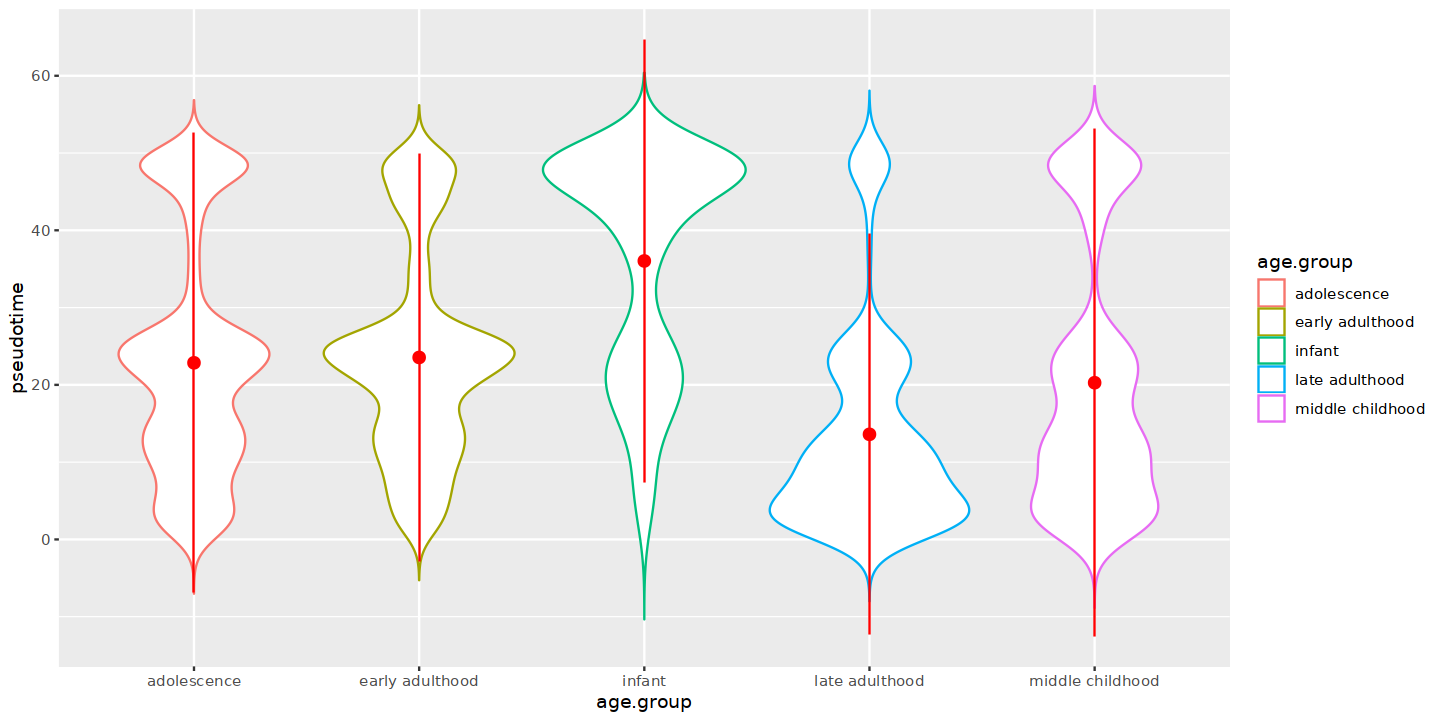

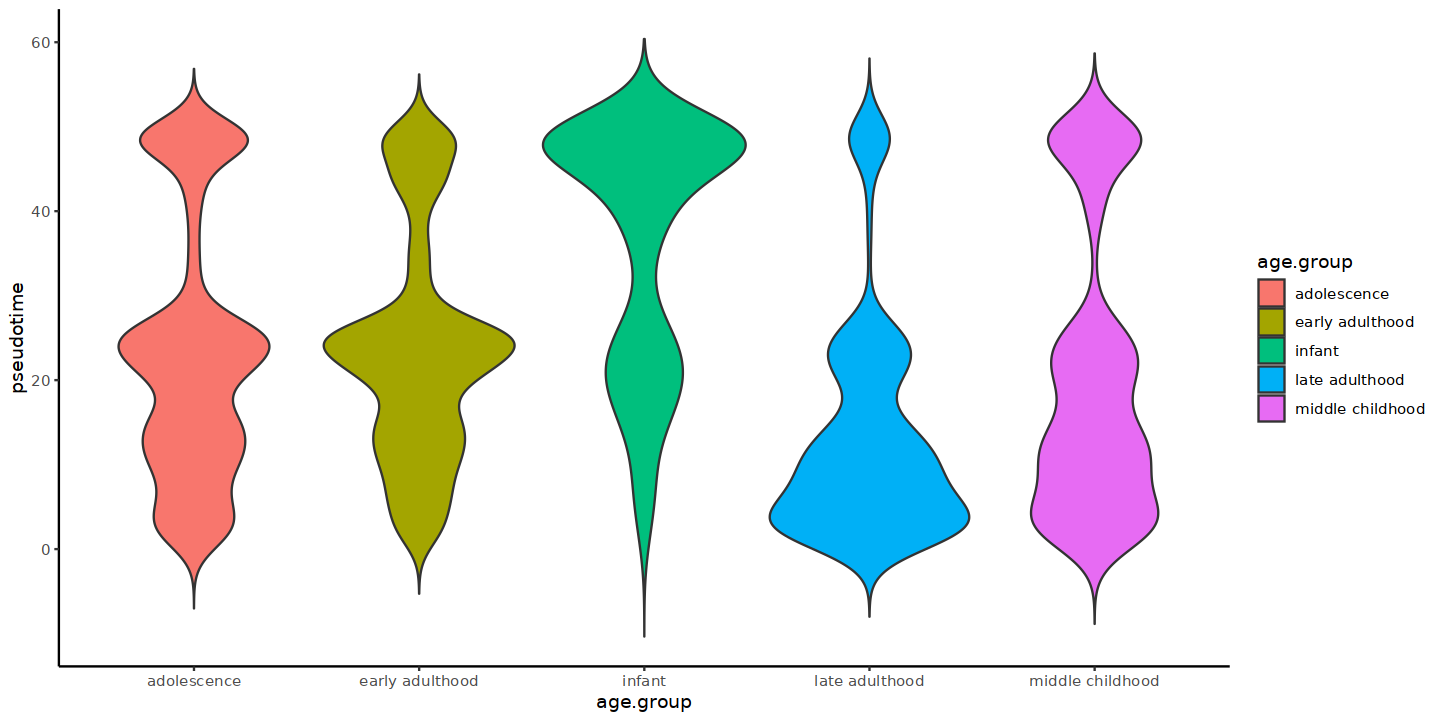

In [71]:
#--- get pseudotime distribution across age groups

p <- ggplot(DF, aes(x=age.group, y=pseudotime, color=age.group)) + 
    geom_violin(trim=FALSE)

options(repr.plot.width=12, repr.plot.height=6)

p + stat_summary(fun.data=mean_sdl, mult=1, 
                 geom="pointrange", color="red")

ggplot(DF, aes(x=age.group, y=pseudotime, fill=age.group)) + 
    geom_violin(trim=FALSE)+
theme_classic()

Warning message in stat_summary(fun.data = mean_sdl, mult = 1, geom = "pointrange", :
"Ignoring unknown parameters: `mult`"


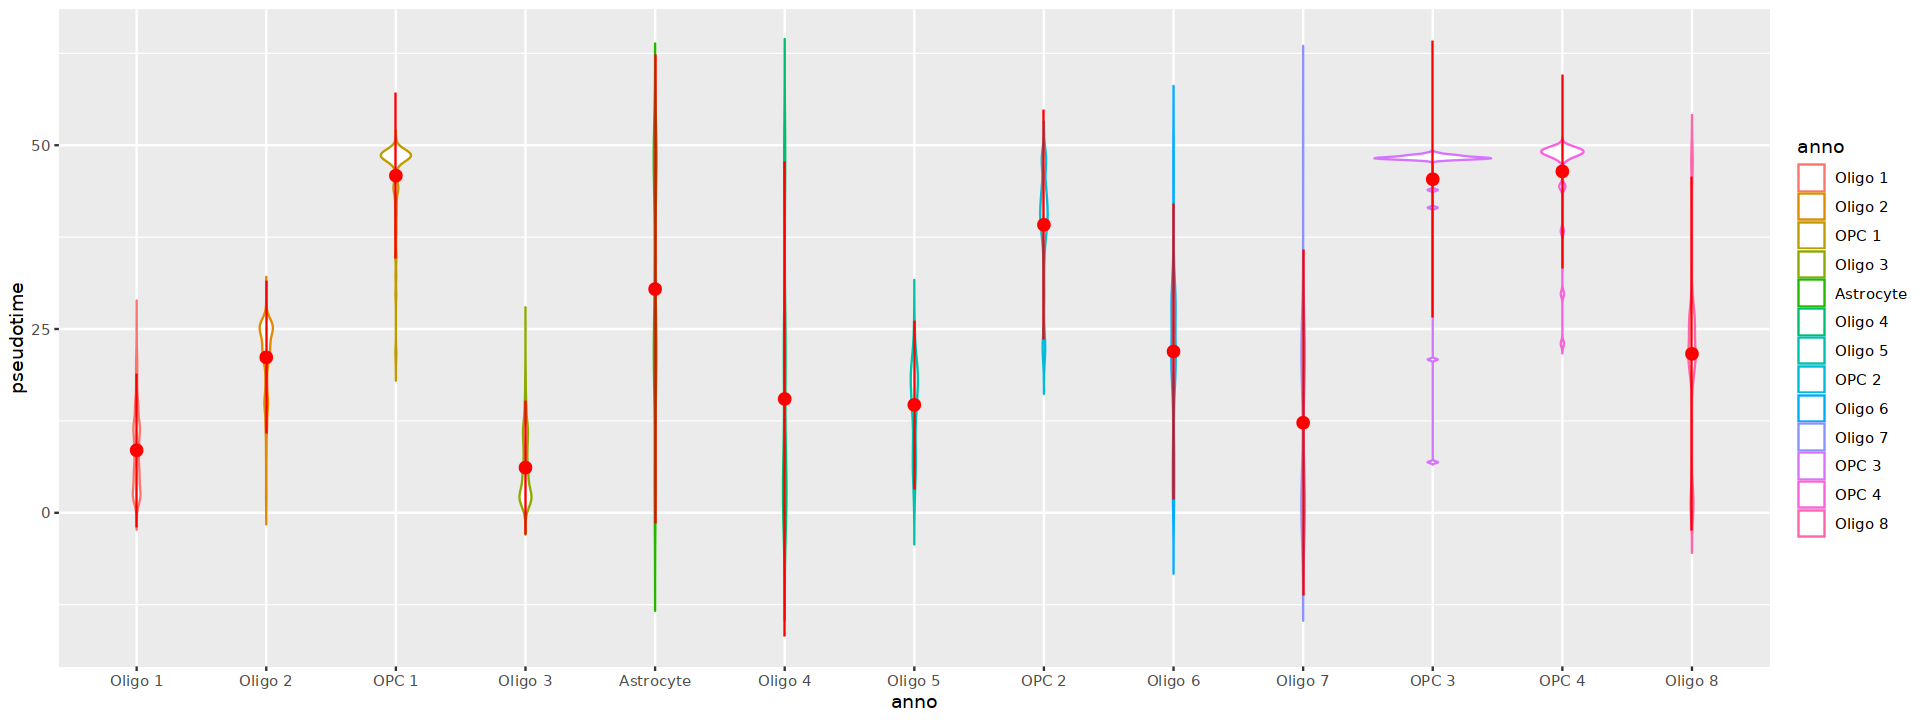

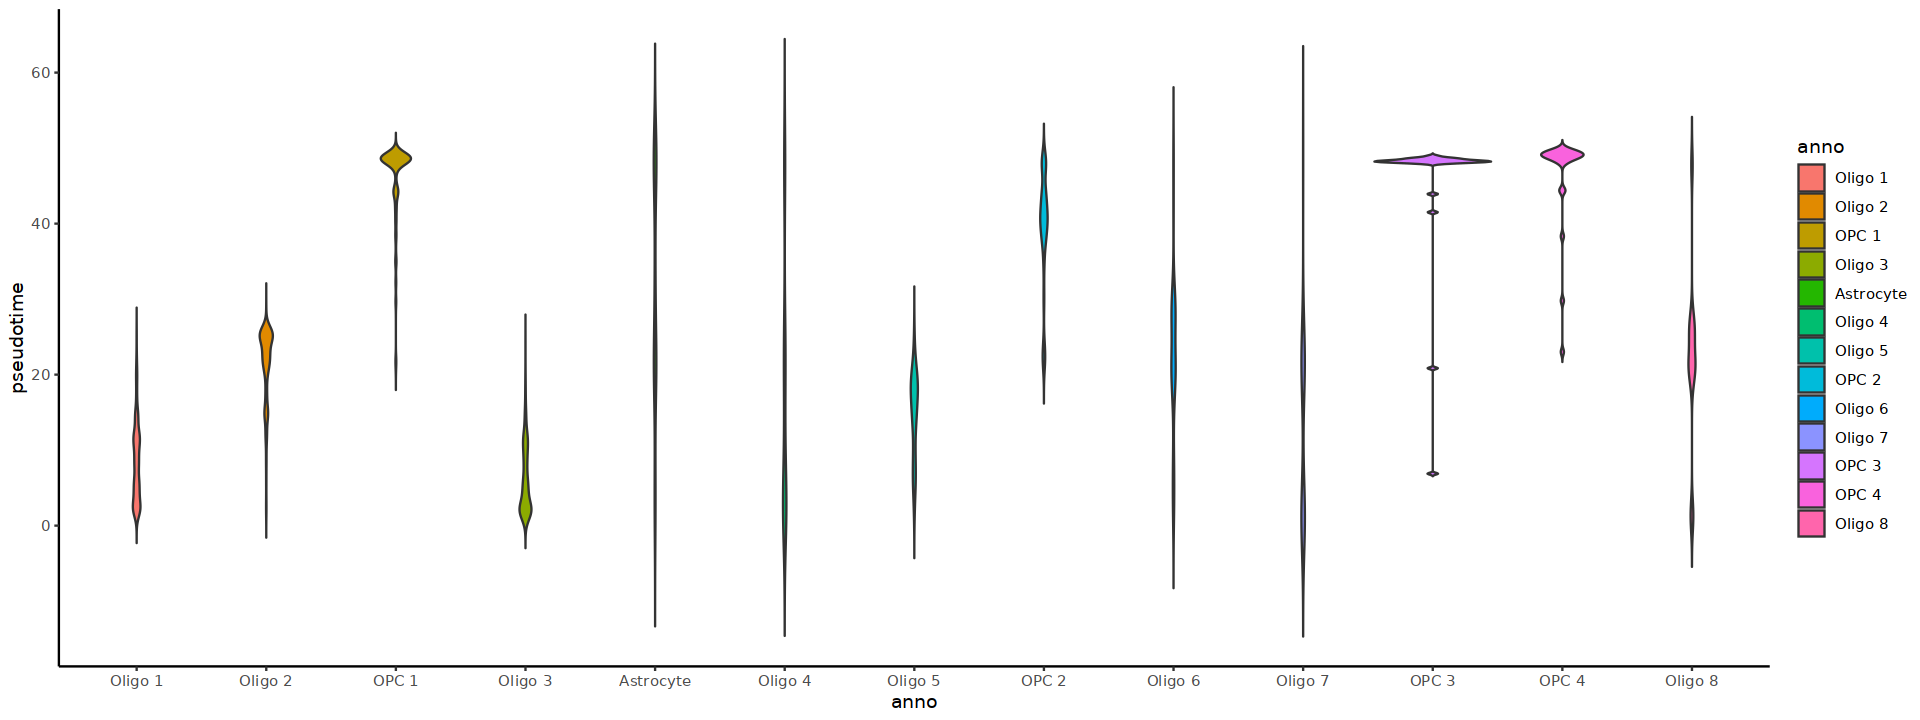

In [73]:
#---- get pseudotime distribution across annotated clusters

p <- ggplot(DF, aes(x=anno, y=pseudotime, color=anno)) + 
    geom_violin(trim=FALSE)

options(repr.plot.width=16, repr.plot.height=6)

p + stat_summary(fun.data=mean_sdl, mult=1, 
                 geom="pointrange", color="red")

ggplot(DF, aes(x=anno, y=pseudotime, fill=anno)) + 
    geom_violin(trim=FALSE)+
theme_classic()

In [75]:
DF$pseudotime2 <- -(DF$pseudotime)
head(DF)


,pseudotime,age.group,anno,state,brain.region,pseudotime2
,<dbl>,<chr>,<fct>,<fct>,<chr>,<dbl>
1,10.348313,late adulthood,Oligo 1,1,CN,-10.348313
2,5.833058,late adulthood,Oligo 1,1,CN,-5.833058
3,2.249955,late adulthood,Oligo 1,1,CN,-2.249955
4,47.989449,early adulthood,OPC 1,3,Hipp,-47.989449
5,16.821136,adolescence,Oligo 1,1,DLPFC,-16.821136
6,4.139127,late adulthood,Oligo 1,1,DLPFC,-4.139127


Warning message in stat_summary(fun.data = mean_sdl, mult = 1, geom = "pointrange", :
"Ignoring unknown parameters: `mult`"


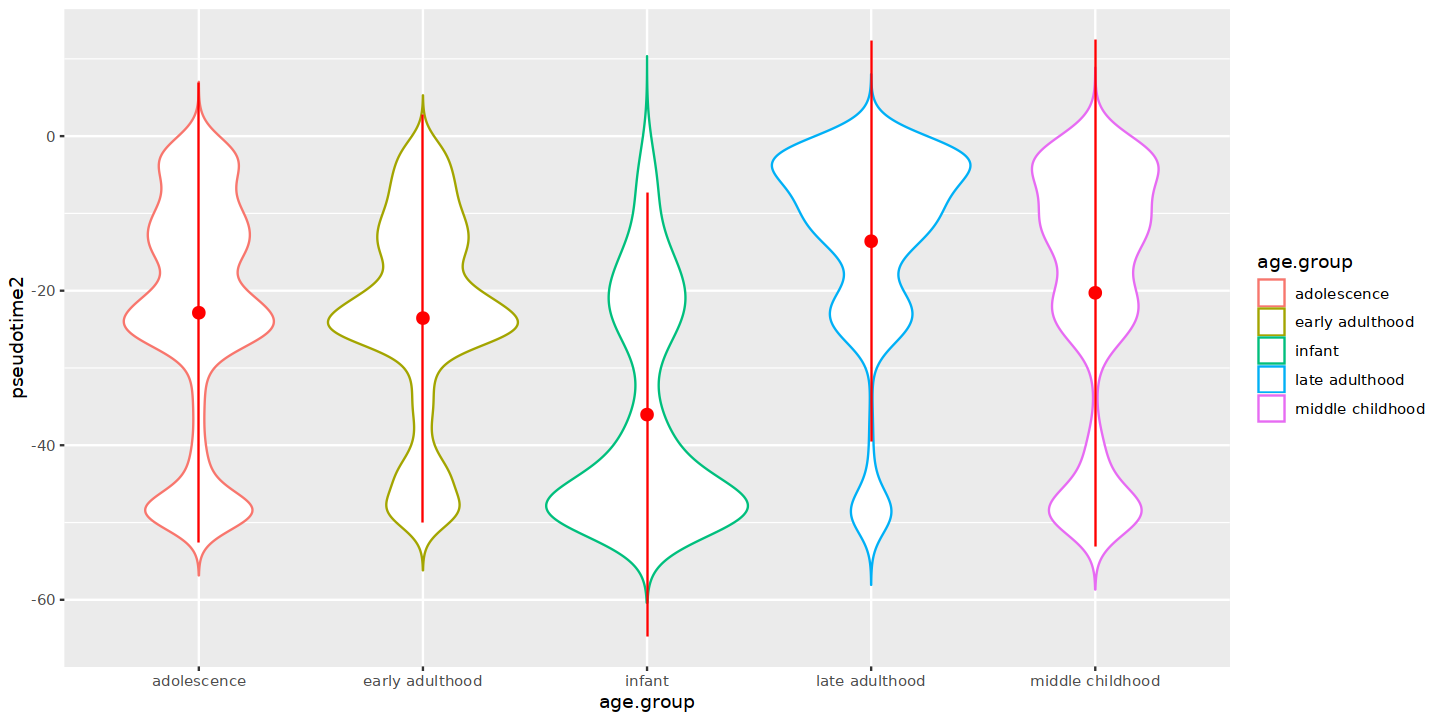

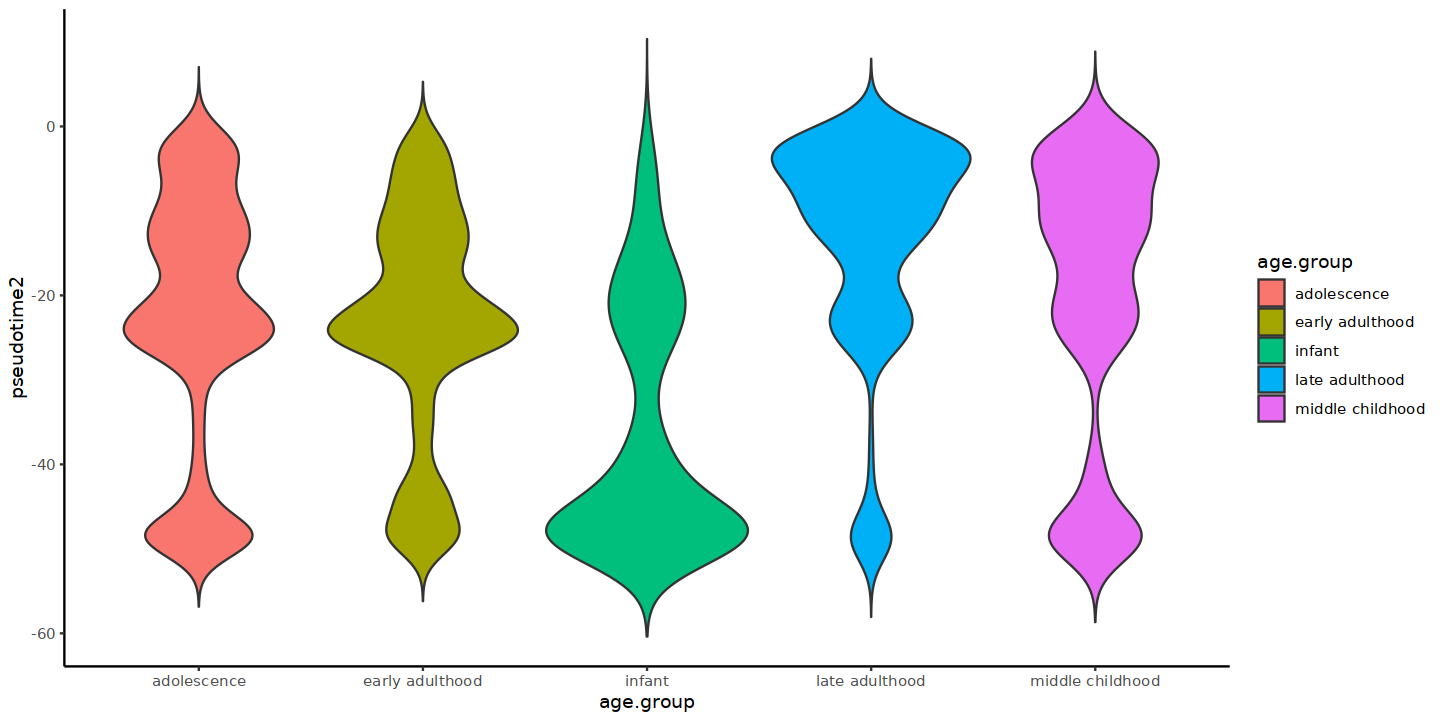

In [76]:
p <- ggplot(DF, aes(x=age.group, y=pseudotime2, color=age.group)) + 
    geom_violin(trim=FALSE)

options(repr.plot.width=12, repr.plot.height=6)

p + stat_summary(fun.data=mean_sdl, mult=1, 
                 geom="pointrange", color="red")

ggplot(DF, aes(x=age.group, y=pseudotime2, fill=age.group)) + 
    geom_violin(trim=FALSE)+
theme_classic()